In [1]:
!pip install textstat seaborn

In [1]:
# !pip install --upgrade numpy scipy nltk scikit-learn textstat torch pandas

In [1]:
import textstat
import nltk
from nltk.corpus import wordnet
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
def compute_metrics(text):
    
    return {
        "flesch_reading_ease": textstat.flesch_reading_ease(text),
        "gunning_fog": textstat.gunning_fog(text),
        "smog_index": textstat.smog_index(text),
        "automated_readability_index": textstat.automated_readability_index(text),
        "lexical_diversity": len(set(text.split())) / len(text.split()) if len(text.split()) > 0 else 0,
        "syllable_count": textstat.syllable_count(text),
        "complex_word_count": textstat.difficult_words(text),
        "avg_word_length": sum(len(word) for word in text.split()) / len(text.split()) if len(text.split()) > 0 else 0,
        "sentence_length": len(text.split()),
        "flesch_kincaid_grade": textstat.flesch_kincaid_grade(text),
        "coleman_liau_index": textstat.coleman_liau_index(text),
        "dale_chall_readability_score": textstat.dale_chall_readability_score(text),
        "linsear_write_formula": textstat.linsear_write_formula(text),
        "text_standard": textstat.text_standard(text),
        "fernandez_huerta": textstat.fernandez_huerta(text),
        "szigriszt_pazos": textstat.szigriszt_pazos(text),
        "gutierrez_polini": textstat.gutierrez_polini(text),
        "crawford": textstat.crawford(text),
        "gulpease_index": textstat.gulpease_index(text),
        "osman": textstat.osman(text)
    }

In [3]:
sentence = "This is an example sentence to evaluate."
metrics = compute_metrics(sentence)
print(metrics)

{'flesch_reading_ease': 55.91, 'gunning_fog': 14.23, 'smog_index': 0.0, 'automated_readability_index': 5.0, 'lexical_diversity': 1.0, 'syllable_count': 12, 'complex_word_count': 2, 'avg_word_length': 4.857142857142857, 'sentence_length': 7, 'flesch_kincaid_grade': 7.2, 'coleman_liau_index': 7.37, 'dale_chall_readability_score': 8.5, 'linsear_write_formula': 4.5, 'text_standard': '4th and 5th grade', 'fernandez_huerta': 97.7, 'szigriszt_pazos': 93.04, 'gutierrez_polini': 47.02, 'crawford': 2.1, 'gulpease_index': 83.3, 'osman': 76.24}


In [4]:
sentence = "This is an example."
avg_word_length = sum(len(word) for word in sentence.split()) / len(sentence.split())
print(f"Average word length: {avg_word_length}")

Average word length: 4.0


In [6]:
df = pd.read_csv('data_logs/wmt14_bleu_threshold.csv')
# df = pd.read_csv('data_logs/cnndailymail_rouge_threshold.csv')

In [8]:
df_metrics = df['input_text'].loc[df['input_text'].str.len() > 1].apply(compute_metrics).apply(pd.Series)
df = pd.concat([df, df_metrics], axis=1)

In [9]:
df.head()

,input_text,1b,3b,8b,flesch_reading_ease,gunning_fog,smog_index,automated_readability_index,lexical_diversity,syllable_count,...,coleman_liau_index,dale_chall_readability_score,linsear_write_formula,text_standard,fernandez_huerta,szigriszt_pazos,gutierrez_polini,crawford,gulpease_index,osman
0,Wiederaufnahme der Sitzungsperiode,0,0,1,9.21,27.87,0.0,30.3,1.000000,7.0,...,36.32,19.58,2.50,12th and 13th grade,65.78,58.47,-9.33,1.2,82.3,-60.19
1,"Ich erkläre die am Freitag, dem 17. Dezember u...",1,1,1,48.30,12.70,0.0,16.7,1.000000,48.0,...,19.13,19.06,8.75,10th and 11th grade,90.05,89.22,28.25,3.3,44.2,21.81
2,"Wie Sie feststellen konnten, ist der gefürchte...",0,0,1,43.90,11.82,0.0,20.6,1.000000,38.0,...,24.86,19.95,6.50,9th and 10th grade,88.13,83.60,18.54,3.5,39.5,-6.78
3,Im Parlament besteht der Wunsch nach einer Aus...,0,1,1,55.24,11.40,0.0,14.5,1.000000,25.0,...,16.53,17.26,9.00,9th and 10th grade,94.52,93.49,32.61,3.0,48.4,33.42
4,Heute möchte ich Sie bitten - das ist auch der...,1,1,1,48.47,18.85,0.0,22.2,0.909091,45.0,...,16.78,18.42,21.50,21st and 22nd grade,85.22,85.40,28.34,3.0,39.0,18.78


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   input_text                    5000 non-null   object 
 1   1b                            5000 non-null   int64  
 2   3b                            5000 non-null   int64  
 3   8b                            5000 non-null   int64  
 4   flesch_reading_ease           4995 non-null   float64
 5   gunning_fog                   4995 non-null   float64
 6   smog_index                    4995 non-null   float64
 7   automated_readability_index   4995 non-null   float64
 8   lexical_diversity             4995 non-null   float64
 9   syllable_count                4995 non-null   float64
 10  complex_word_count            4995 non-null   float64
 11  avg_word_length               4995 non-null   float64
 12  sentence_length               4995 non-null   float64
 13  fle

In [11]:
keys = [
    "flesch_reading_ease", "gunning_fog", "smog_index", 
    "automated_readability_index", "lexical_diversity", 
    "syllable_count", "complex_word_count", "avg_word_length", 
    "sentence_length", "flesch_kincaid_grade", 
    "coleman_liau_index", "dale_chall_readability_score", 
    "linsear_write_formula", "text_standard", 
    "fernandez_huerta", "szigriszt_pazos", 
    "gutierrez_polini", "crawford", "gulpease_index", "osman"
]

In [12]:
can_handle_df = df[df['1b'] == 1]
cannot_handle_df = df[df['1b'] == 0]

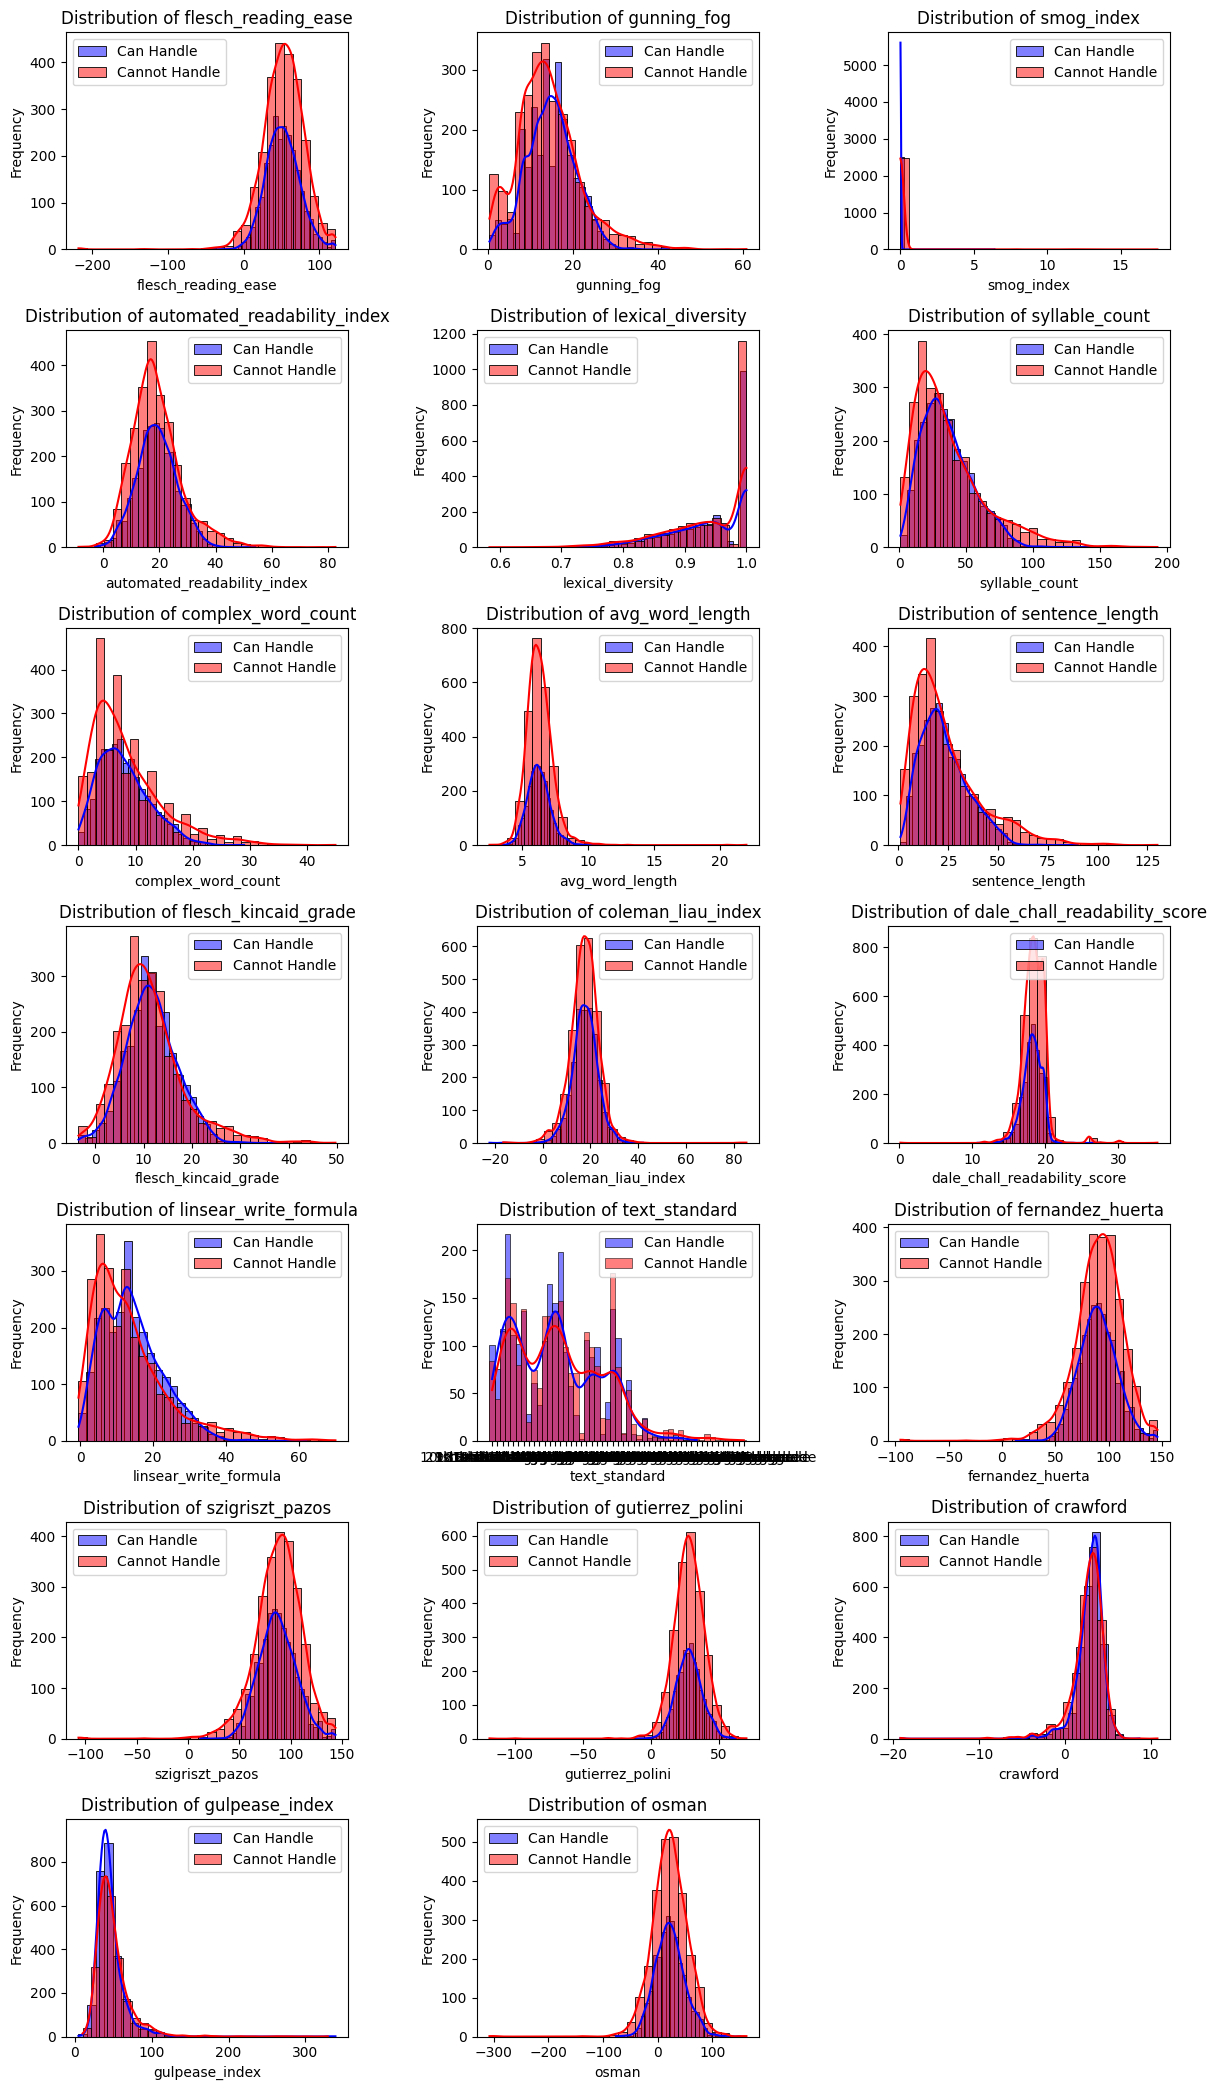

In [13]:
num_metrics = len(metrics)

cols = 3
rows = math.ceil(num_metrics / cols)

fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 3))  
axes = axes.flatten() 

for i, metric in enumerate(metrics):
    sns.histplot(can_handle_df[metric], color='blue', alpha=0.5, bins=30, kde=True, label='Can Handle', ax=axes[i])
    sns.histplot(cannot_handle_df[metric], color='red', alpha=0.5, bins=30, kde=True, label='Cannot Handle', ax=axes[i])
    axes[i].set_title(f"Distribution of {metric}")
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel("Frequency")
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('distributions.png')
plt.show()

In [14]:
correlation_results = {}
for metric in metrics:
    correlation_results[metric] = df[metric].corr(df['1b'])
print("Correlations with '1b':", correlation_results)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/ubuntu/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_2529091/3431855064.py", line 3, in <module>
    correlation_results[metric] = df[metric].corr(df['1b'])
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pandas/core/series.py", line 2727, in corr
    return nanops.nancorr(
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pandas/core/nanops.py", line 96, in _f
    return f(*args, **kwargs)
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pandas/core/nanops.py", line 1614, in nancorr
    return f(a, b)
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pandas/core/nanops.py", line 1637, in func
    return np.corrcoef(a, b)[0, 1]
  File "<__array_function__ internals>", line 200, in corrcoef
  File "/home/ubuntu/.local/lib/python3.8/site-packages/numpy/lib/function_base.py", line 2846, in co

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch.nn as nn

In [20]:
exclude_cols = ['input_text', '3b']

feature_cols = [col for col in df.columns if col not in exclude_cols]

X = df[feature_cols].values
y = df[['3b']]

In [21]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/ubuntu/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_2529091/2310620755.py", line 2, in <module>
    X = scaler.fit_transform(X)
  File "/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/utils/_set_output.py", line 157, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py", line 916, in fit_transform
    return self.fit(X, **fit_params).transform(X)
  File "/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/preprocessing/_data.py", line 839, in fit
    return self.partial_fit(X, y, sample_weight)
  File "/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/preprocessing/_data.py", li

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.to_numpy(), dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/ubuntu/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_2529091/3884698684.py", line 1, in <module>
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint64, uint32, uint16, uint8, and bool.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ubuntu/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/ubuntu/.local/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1396, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/home/ubuntu/.

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=8, shuffle=False)

In [ ]:
class SimpleNet(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32,64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,1)
        )

    def forward(self, x):
        return self.fc(x)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleNet(input_dim=len(feature_cols)).to(device)

In [ ]:
BCE_loss = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [ ]:
num_epochs = 100

In [ ]:
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = BCE_loss(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_dataloader)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = BCE_loss(outputs, y_batch)
            val_loss += loss.item()
            
    val_loss /= len(val_dataloader)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

In [ ]:
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = BCE_loss(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_dataloader)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for X_batch, y_batch in val_dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = BCE_loss(outputs, y_batch)
            val_loss += loss.item()
            
            preds = (outputs > 0.5).float()  
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    val_loss /= len(val_dataloader)
    val_losses.append(val_loss)

    conf_matrix = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - Epoch {epoch+1}")
    plt.show()

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

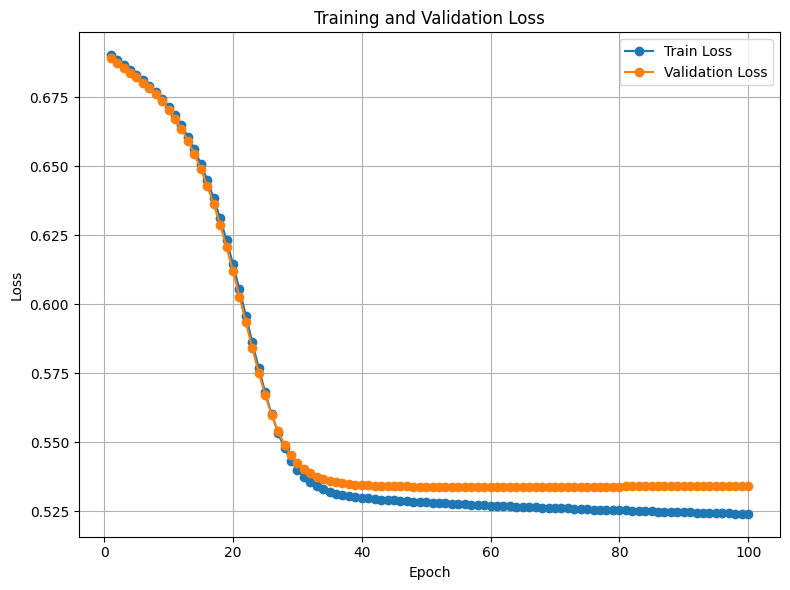

In [41]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('loss_plot.png')
plt.show()